### 08 분류 실습 - 캐글 산탄데르 고객 만족 예측

- 피처 이름은 모두 익명 처리돼 이름만을 가지고 어떤 속성인지 추정할 수 없음
- 클래스 레이블명 TARGET, 1이면 불만을 가진 고객, 0이면 만족한 고객
- 모델성능평가는 ROC-AUC (불만족인 데이터가 일부일 것이기 때문에 정확도보다 적합함)

#### 1) 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('C:/Users/Jaewon/ESAA/train_santander.csv',encoding = 'latin-1')
print('dataset shape :', cust_df.shape)
cust_df.head(3)

dataset shape : (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

# 111개의 피처가 float형, 260개의 피처가 int형으로 모든 피처가 숫자형이며 Null값은 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
# 전체 데이터에서 만족과 불만족의 비율 확인
# 레이블인 Target 속성의 값의 분포 확인

print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.039569


In [4]:
# 각 피처의 값 분포 확인
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# var3칼럼의 min값이 -999999 (특정 예외값 혹은 NaN을 변환했을 것)
# 편차가 심한 -999999를 가장 많은 2로 대체
cust_df['var3'].replace(-999999,2,inplace = True)
# 단순 식별자인 ID 피처를 드롭
cust_df.drop('ID',axis = 1, inplace = True)

#피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame 의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape : {0}'.format(X_features.shape))

피처 데이터 shape : (76020, 369)


In [6]:
# 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트 분리
# 비대칭 데이터 세트이므로 클래스 Target 값 분포도가 학습 데이터와 테스트 데이터 세트에 비슷하게 추출됐는지 확인
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_features, y_labels,test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape : {0}, 테스트 세트 Shape :{1}'.format(X_train.shape,X_test.shape))
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape : (60816, 369), 테스트 세트 Shape :(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


#### 2) XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)
xgb_clf.fit(X_train,y_train,early_stopping_rounds = 100, verbose=0,
            eval_metric = 'auc',eval_set = [(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average = 'macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.8413


In [10]:
# 하이퍼 파라미터 튜닝
# 칼럼 개수가 많으므로 과적합 가능성을 가정하고 max_depth, min_child_weight, colsample_bytree 하이퍼 파라미터만 일차 튜닝 대상으로 선택

from sklearn.model_selection import GridSearchCV
#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators = 100)
params = {'max_depth' : [5,7],'min_child_weight' : [1,3], 'colsample_bytree' : [0.5,0.75]}

# CV는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid = params ,cv = 3)
gridcv.fit(X_train,y_train,early_stopping_rounds = 30, eval_metric = 'auc', verbose=0,
           eval_set = [(X_train,y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

GridSearchCV 최적 파라미터 : {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
ROC AUC : 0.8445


In [12]:
# 앞서 구한 최적화 하이퍼 파라미터를 기반으로 다른 하이퍼 파라미터를 변경 또는 추가해 다시 최적화 진행
# n_estimators 는 1000으로 증가시키고, learning_rate = 0.02로 감소, reg_alpha = 0.03으로 추가함

xgb_clf = XGBClassifier(n_estimators = 1000,random_state = 156, learning_rate = 0.02, max_depth = 8,
                        min_child_weight = 1, colsample_bytree = 0.75, reg_alpha = 0.03)

#성능 평가 지표를 auc로, 조기중단 파라미터 값은 200으로 설정하고 학습 수행
xgb_clf.fit(X_train,y_train,early_stopping_rounds = 200, verbose=0, 
            eval_metric = 'auc', eval_set = [(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

ROC AUC : 0.8448


- 살짝 향상된 결과 확인 가능, GBM을 기반으로 하고 있기 때문에 수행시간이 상당히 요구된다는 단점

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

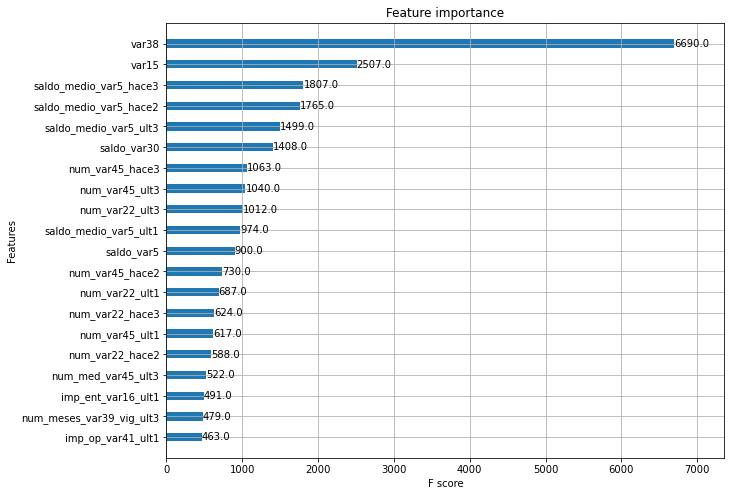

In [13]:
#중요도 피처 그래프
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize = (10,8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

#### 3) LightGBM 모델 학습과 하이퍼파라미터 튜닝

In [15]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train,y_train,early_stopping_rounds = 100, eval_metric = 'auc',eval_set = evals, verbose=0)

lgbm_roc_score = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1],average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

ROC AUC : 0.8409


In [17]:
# 하이퍼 파라미터 튜닝
# 튜닝 대상은 num_leaves, max_depth, min_child_samples, subsample

from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators = 200)

params = {
    'num_leaves' : [32,64],
    'max_depth' : [128,160],
    'min_child_samples' : [60,100],
    'subsample' : [0.8,1]
}

gridcv = GridSearchCV(lgbm_clf, param_grid = params,cv = 3)
gridcv.fit(X_train,y_train,early_stopping_rounds = 30,eval_metric = 'auc', verbose=0,
           eval_set = [(X_train,y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

GridSearchCV 최적 파라미터 : {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC : 0.8417


In [18]:
# 최적 하이퍼 파라미터를 적용해 다시 학습하여 ROC-AUC 결과 도출 (n_estimators = 1000)
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 32, subsample= 0.8, min_child_samples = 100,
                          max_depth = 128)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train,y_train,early_stopping_rounds = 100, eval_metric = 'auc',eval_set = evals, verbose = 0)

lgbm_roc_score = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1],average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

ROC AUC : 0.8417


### 09 분류 실습 - 캐글 신용카드 사기 검출
- 레이블인 Class 속성은 불균형한 분포
 - 0은 사기가 아닌 정상적인 신용카드 트랜재션 데이터
 - 1은 신용카드 사기 트랜잭션

#### 1) 언더 샘플링과 오버 샘플링의 이해
- 레이블이 불균형한 분포를 가진 데이터 세트를 학습시킬때 발생하는 예측 성능의 문제
- 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적기 때문에 제대로 다양한 유형을 학습하지 못하기 때문에, 정상 레이블로 치우친 학습을 수행해 제대로 된 이상 레이터 검출이 어려워지기 쉬움
- 적절한 학습 데이터를 확보하는 방안으로 언더 샘플링과 오버 샘플링이 있으며, 오버 샘플링 방식이 예측 성능상 유리한 경우가 많아 주로 사용됨

1. 언더샘플링 
 1. 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식
 2. 과도하게 정상 레이블로 학습/ 예측 하는 부작용을 개선할 수 있지만, 정상 레이블의 경우 오히려 제대로 된 학습을 수행할 수 없다는 단점이 있음
2. 오버샘플링 
 1. 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법
 2. 단순 증식시 과적합되기 때문에 원본 데이터의 피처 값들을 약간 변경하여 증식
 3. **SMOTE** (synthetic minority over-sampling technique) : 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아서 이 데이터와 K개 이웃들 (K Nearest Neighbor) 의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방식 (imbalanced-learn 패키지 이용 가능)
 
 #### 2) 데이터 일차 가공 및 모델 학습/예측/평가

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('C:/Users/Jaewon/ESAA/creditcard.csv')
card_df.head(3)
# 피처들의 의미 알 수 없음
# Amount 피처는 신용카드 트랜잭션 금액

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [24]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤, Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df (df = None):
    df_copy = df.copy()
    # Time 피처의 경우 데이터 생성 관련 작업용 속성으로서 큰 의미가 없기에 제거
    df_copy.drop('Time',axis = 1,inplace = True)
    return df_copy

# 사전 데이터 가공 후 학습 데이터와 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df =None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    # train_test_split()으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train,X_test,y_train,y_test = train_test_split(X_features, y_target,test_size = 0.3,random_state = 0, stratify = y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train,X_test,y_train,y_test

In [25]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 예측 성능 평가 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [28]:
# 로지스틱 회귀와 LightGBM 기반의 모델로 데이터 가공을 수행하며 예측 성능 변화 파악
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,lr_pred,lr_pred_proba)

오차 행렬
[[85281    14]
 [   59    89]]
정확도: 0.9991, 정밀도: 0.8641, 재현율: 0.6014,    F1: 0.7092, AUC:0.9571


In [29]:
# 인자로 사이킷런의 Estimator의 객체와 학습/테스트 데이터 세트를 입력받아서 학습/예측/평가 수행
def get_model_train_eval(model,ftr_train= None, ftr_test = None, tgt_train = None, tgt_test = None) :
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba)

In [30]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train,ftr_test = X_test,tgt_train = y_train, tgt_test = y_test)

# 로지스틱 회귀보다 높은 재현율과 ROC-AUC

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


#### 3) 데이터 분포도 변환 후 모델 학습/예측/평가

<AxesSubplot:xlabel='Amount', ylabel='Density'>

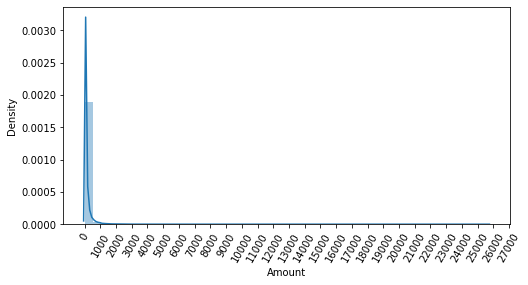

In [31]:
import seaborn as sns
plt.figure(figsize =(8,4))
plt.xticks(range(0,30000,1000),rotation = 60)
sns.distplot(card_df['Amount'])

In [32]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df = None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    # 변환된 Amount를 Amount_Scalred로 피처명 변경 후 DataFrame맨 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled',amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'],axis = 1, inplace = True)
    return df_copy

In [33]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print('##로지스틱 회귀 예측 성능##')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf,ftr_train = X_train,ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

print('##LightGBM 예측 성능##')
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs =-1)
get_model_train_eval(lgbm_clf,ftr_train = X_train, ftr_test = X_test,tgt_train = y_train,tgt_test = y_test)

##로지스틱 회귀 예측 성능##
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
##LightGBM 예측 성능##
오차 행렬
[[85248    47]
 [   69    79]]
정확도: 0.9986, 정밀도: 0.6270, 재현율: 0.5338,    F1: 0.5766, AUC:0.7666


- 정규 분포 형태로 Amount 피처값 변환 후 두 모델 모두 변환 이전과 비교해 성능이 크게 개선되지는 않음
- 로그 변환을 수행 : 데이터 분포도가 심하게 왜곡되어있을 경우 적용하는 중요 기법중에 하나

In [34]:
def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    # 넘파이의 ㅣog1p()를 이용해 Amount를 로그변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis = 1, inplace = True)
    return df_copy

X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print('###로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf,ftr_train = X_train,ftr_test = X_test,tgt_train = y_train, tgt_test = y_test)

print('\n###LightGBM 예측 성능###')
get_model_train_eval(lgbm_clf,ftr_train = X_train,ftr_test =X_test,tgt_train = y_train,tgt_test = y_test)

###로지스틱 회귀 예측 성능###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727

###LightGBM 예측 성능###
오차 행렬
[[85174   121]
 [  148     0]]
정확도: 0.9969, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.4992


- 두 모델 모두 정밀도, 재현율, ROC-AUC에서 약간씩 성능이 개선됨

#### 4) 이상치 제거 후 모델 학습/예측/평가
- IQR (Inter Quantile Range) : 사분위 값의 편차를 이용하는 기법. IQR에 1.5를 곱해서 생성된 범위를 이용해 최댓값과 최솟값을 결정한 뒤 최댓값을 초과하거나 최솟값에 미달하는 데이터를 이상치로 간주
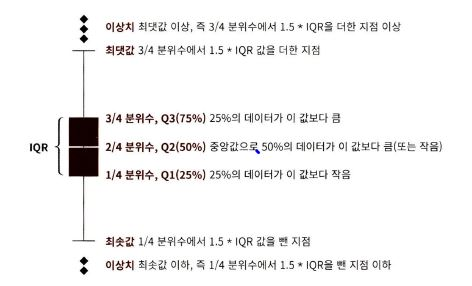
- 많은 피처가 있을 경우 결정값(레이블)과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋음

<AxesSubplot:>

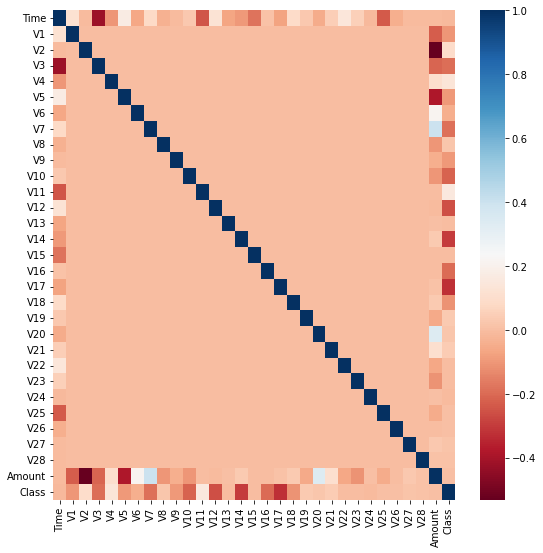

In [36]:
# 각 피처별로 상관도 구한 뒤 시각화
# 양의 상관관계가 높을 수록 진한 파란색, 음의 상관관계가 높을수록 진한 빨간색에 가깝게 표현됨
import seaborn as sns

plt.figure(figsize = (9,9))
corr = card_df.corr()
sns.heatmap(corr,cmap = 'RdBu')

# V134, V17이 상관관계가 높음

In [37]:
import numpy as np

# 인자로 DataFrame과 이상치를 검출한 칼럼을 입력받아 해당 이상치가 있는 DataFrame Index를 반환하는 함수
def get_outlier(df= None, column = None, weight = 1.5) :
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values,25)
    quantile_75 = np.percentile(fraud.values,75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud<lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [38]:
outlier_index = get_outlier(df = card_df, column = 'V14',weight = 1.5)
print('이상치 데이터 인덱스 :', outlier_index)

이상치 데이터 인덱스 : Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [39]:
# get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df = None) :
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis = 1, inplace = True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df = df_copy, column = 'V14',weight = 1.5)
    df_copy.drop(outlier_index, axis = 0, inplace = True)
    return df_copy

X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)
print("##로지스틱 회귀 예측 성능##")
get_model_train_eval(lr_clf,ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)
print('##LightGBM 예측 성능##')
get_model_train_eval(lgbm_clf,ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

##로지스틱 회귀 예측 성능##
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
##LightGBM 예측 성능##
오차 행렬
[[85268    27]
 [   36   110]]
정확도: 0.9993, 정밀도: 0.8029, 재현율: 0.7534,    F1: 0.7774, AUC:0.9219


- 이상치 데이터를 제거한 뒤 두 모델 모두 예측 성능이 크게 향상됨

#### 4)  SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
- imbalanced-learn 패키지의 SMOTE 클래스 이용해 구현
- 반드시 학습 데이터 세트만 오버샘플링.
 - 검증/테스트 데이터세트를 오버샘플링할 경우 원본 데이터가 아닌 데이터 세트에서 검증 또는 테스트를 수행하기 때문에 올바른 검증/테스트가 될 수 없음

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ',X_train.shape,y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ',X_train_over.shape,y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포 : \n',pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포 : 
 0    199020
1    199020
Name: Class, dtype: int64


In [42]:
# 로지스틱 회귀 모델 학습한 뒤 성능 평가
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf,ftr_train = X_train_over,ftr_test = X_test,tgt_train = y_train_over,tgt_test = y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


- 재현율이 크게 증가하지만 정밀도가 급겁하게 저하. 이정도로 저조한 정밀도로는 현실 업무에 적용할 수 없음. 
- 분류 결정 임곗값에 따른 정밀도와 재현율 곡선을 통해 SMOTE로 학습된 로지스틱 회귀 모델에 어떠한 문제가 발생하고 있는지 시각적으로 확인해보자.

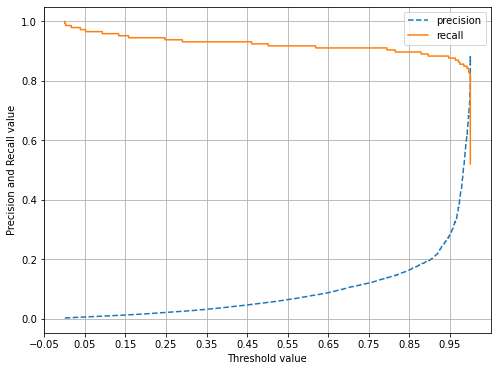

In [44]:
def precision_recall_curve_plot(y_test,pred_proba_c1) :
    from sklearn.metrics import precision_recall_curve
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)

    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')

    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

- 임계값 0.99 이하에서는 재현율이 매우 좋고 정밀도가 극단적으로 낮다가 0.99 이상에서는 반대로 재현율이 대폭 떨어지고 정밀도가 높아짐
- 분류 결정 임계값을 조정하더라도 임계값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없으므로 로지스틱 회귀 모델의 경우 SMOTE 적용 후 올바른 예측모델이 생성되지 못함

In [45]:
# LightGBM 모델을 SMOTE로 오버 샘플링된 데이터 세트로 학습/예측/평가 수행
lgbm_clf = LGBMClassifier(n_estimators = 1000,num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf,ftr_train = X_train_over, ftr_test = X_test, tgt_train = y_train_over,tgt_test = y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.9814


- 재현율이 높아졌지만 정밀도는 이전보다 낮아짐 (일반적인 결과), 좋은 SMOTE 패키지일수로고 재현율 증가율은 높이고 정밀도 감소율은 낮출 수 있도록 효과적으로 데이터를 증식함